# EWMA models :

<i>EXPONENTIALLY WEIGHTED MOVING AVERAGE models </i>

SMA = Simple Moving Averages

> we learnt to create moving averagess (the simple ones) through ROLLING WINDOW.

Window size affects the kind of trend we observe like :
1. longer window = general trend
2. shorter window = gives more specific behaviour of that time series  >> Seasonality sorta

these SMAs can be used for building simple & generalized TSA models.

    


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
airline = pd.read_csv('Data/airline_passengers.csv', index_col='Month' )

In [3]:
airline.dropna(axis=0 , inplace=True)

In [4]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [5]:
airline.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [6]:
airline.index = pd.to_datetime(airline.index)

In [7]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [9]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [10]:
# 6 month SMA

airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window = 6).mean()

In [11]:
# 12 month SMA

airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window = 12).mean()

In [12]:
airline.tail()

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1960-08-01,606,519.166667,463.333333
1960-09-01,508,534.000000,467.083333
1960-10-01,461,534.000000,471.583333
1960-11-01,390,520.333333,473.916667
1960-12-01,432,503.166667,476.166667


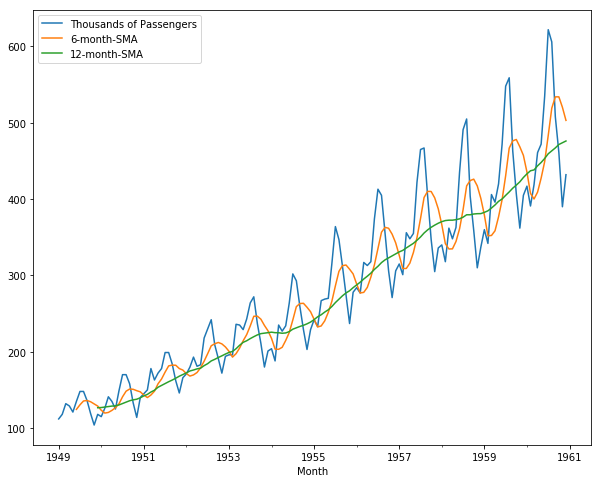

In [13]:
from pylab import rcParams

rcParams['figure.figsize'] = (10,8)

airline.plot()

### EWMA 

1. overcomes the SMA problem that Smaller windows lead to more noise
2. the LAG prob of SMA as you can see in the beginning of the above plot.

with EWMA we'll give the recent data points (ones on the right along x) more weight over the older ones.

In [15]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

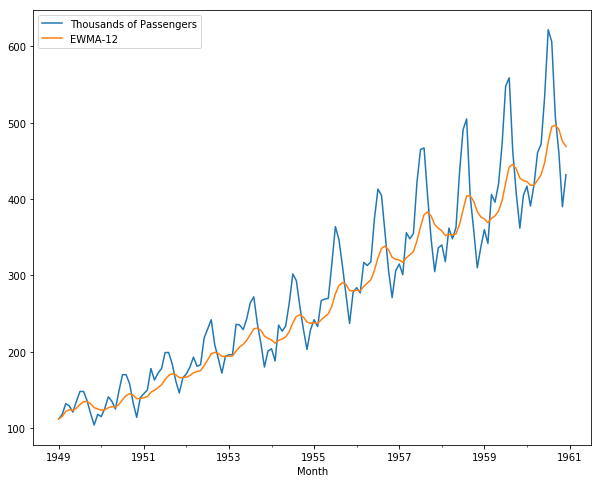

In [16]:
airline[ ['Thousands of Passengers' , 'EWMA-12' ] ].plot();

see the behaviour of plot at the beginning is different than that at the end. 

The SEASONALITY trend is a lot clearer towards the end !
coz recent points weigh more than the older ones.

### understanding the EWM PARAMETERS 

(and learning how to implement them)



